<a href="https://colab.research.google.com/github/msparrowskyIT/python_data_visualisation_lecture/blob/master/Exercise_6_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

**1.**

In [3]:
customers = pd.read_csv("L06_Ecommerce_Customers.csv")
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


**2.**

In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


**3.**

In [6]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


**4.**

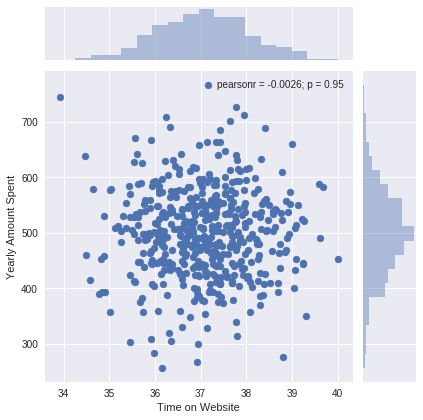

In [7]:
# poniższy wykres nie przedstawia żadnej ścisłej współzależności pomiędzy danymi
sns.jointplot(x="Time on Website", y="Yearly Amount Spent", data=customers)

**5.**

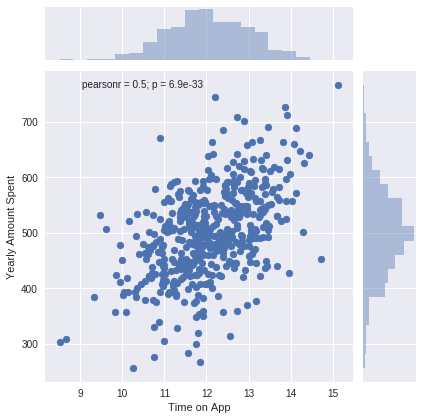

In [8]:
# z poniższego wykresu można wnioskować, że wzrost Time on App powoduje wzrost Yearly Amount Spent
# wydaje się to oczywiste, jednak dodatkowo wiemy, że wzrost czasu spędzonego przy wykorzystaniu
# aplikacji nie wpływa np. na częstotliwość jej uruchamiania
sns.jointplot(x="Time on App", y="Yearly Amount Spent", data=customers)

**6.**

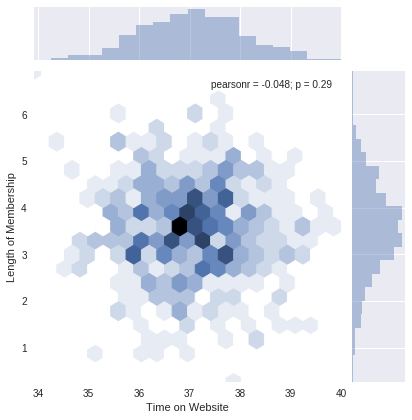

In [10]:
sns.jointplot(x="Time on Website", y="Length of Membership", data=customers, kind="hex")

**7.**

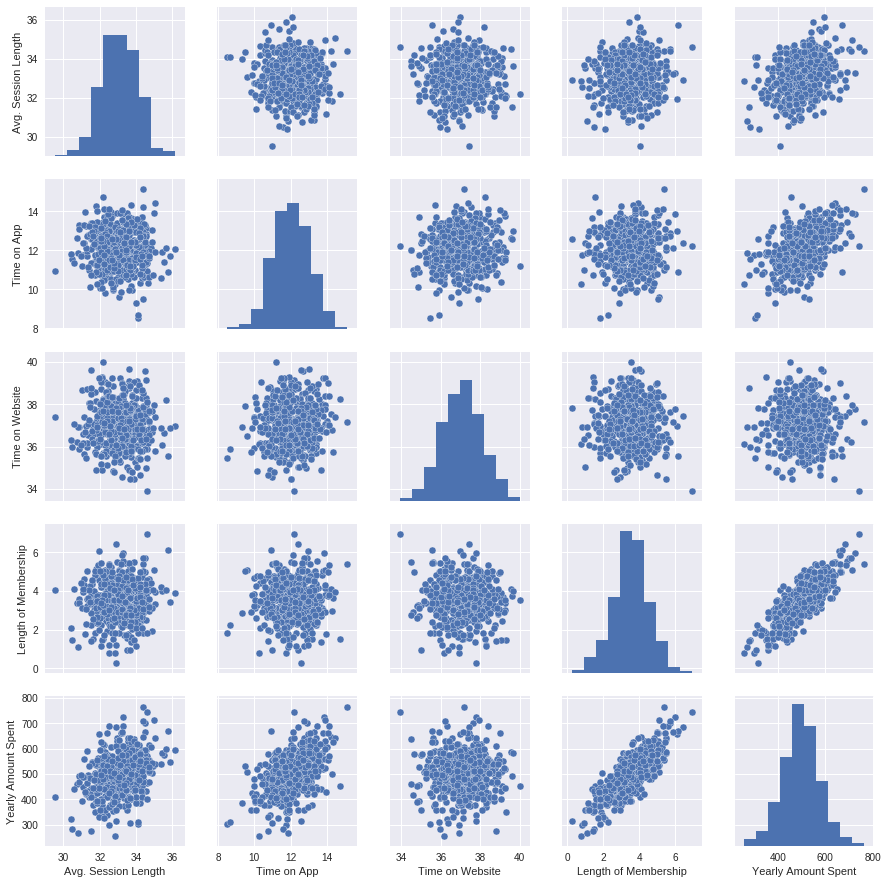

In [11]:
# można wskazać wyraźną zależność pomiędzy Length of Membership oraz Yearly Amount Spent
sns.pairplot(customers)

**8.**

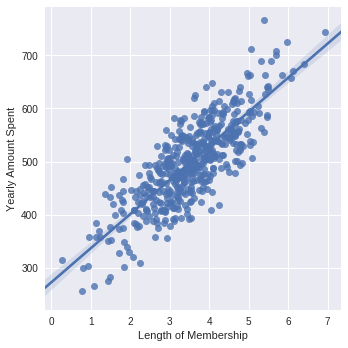

In [12]:
sns.lmplot(x="Length of Membership", y="Yearly Amount Spent", data=customers)

**9.**

In [13]:
X = customers[["Avg. Session Length", "Time on App", "Time on Website", "Length of Membership"]].as_matrix()
y = customers[["Yearly Amount Spent"]].as_matrix()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

lm = LinearRegression()
lm.fit(X_train, y_train)

coefs = lm.coef_
print(coefs[0])

[25.98154972 38.59015875  0.19040528 61.27909654]


**10.**

Text(0,0.5,'Y Predicted')

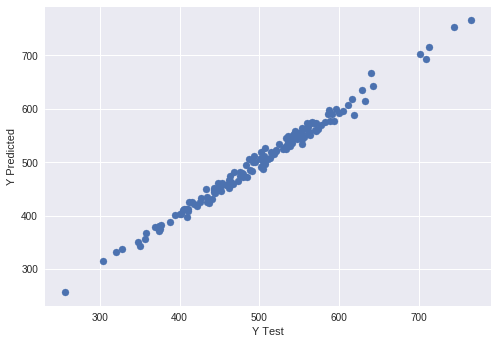

In [18]:
y_pred = lm.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel("Y Test")
plt.ylabel("Y Predicted")

**11.**

In [15]:
num = y_test.shape[0]
mae = np.sum(np.abs((y_test - y_pred)))/num
mse = np.sum(np.power(y_test - y_pred, 2))/num
rmse = np.sqrt(mse)
print(f"MAE: {mae}\nMSE: {mse}\nRMSE: {rmse}")

MAE: 7.228148653430852
MSE: 79.81305165097494
RMSE: 8.933815066978662


**12.**

Text(0.5,0,'Yearly Amount Spent')

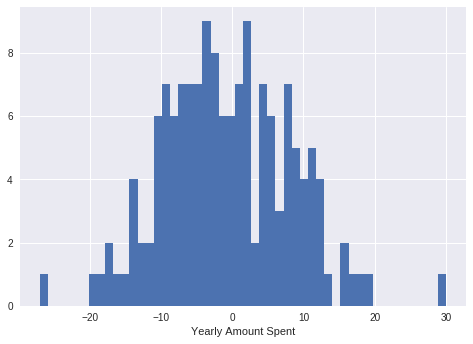

In [17]:
plt.hist(y_test-y_pred, bins=50)
plt.xlabel("Yearly Amount Spent")

In [0]:
# wysoki współczynnik Web on App wskazuje, iż występuje (rosnąca) zależność pomiędzy wspomnianą zmienną a Yearly Amount Spent
# dlatego firma powinna być zorientowana na rozwój aplikacji mobilnej
c_df = pd.DataFrame(data=coefs.T, index=["Avg. Session Length", "Time on App", "Time on Website", "Length of Membership"], columns=["Coefficients"])
c_df

,Coefficients
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097
